<a href="https://colab.research.google.com/github/luthra2059/Clustering-Geolocation-Data-Intelligently-in-Python/blob/master/Clustering_Geolocation_Data_Intelligently_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'
plt.style.use('ggplot')
import pandas as pd
import numpy as np
from tqdm import tqdm
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier
from ipywidgets import interactive
from collections import defaultdict
!pip install --upgrade pip
!pip install numpy>=1.16.0
!pip install Cython
!pip install hdbscan
import hdbscan
import folium
import re
cols = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4',
        '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', 
        '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', 
        '#000075', '#808080']*10

     |████████████████████████████████| 1.5MB 2.8MB/s 
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1
     |████████████████████████████████| 4.7 MB 13.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.26-cp36-cp36m-linux_x86_64.whl size=2308892 sha256=40a32752802ecea6e5bd379e526460ae1c9f9a90faed0c7a9f256609c945e67e
  Stored in directory: /root/.cache/pip/wheels/36/20/d1/521b2fbf637de5bc40668b6445944e7e44bfbe68fdaa65157d
Successfully built hdbscan


In [0]:
df = pd.read_csv('drive/My Drive/datasets/geolocation/taxi_data.csv')

In [4]:
df.head()

LON       LAT                          NAME
0  28.17858 -25.73882         11th Street Taxi Rank
1  28.17660 -25.73795    81 Bazaar Street Taxi Rank
2  27.83239 -26.53722          Adams Road Taxi Rank
3  28.12514 -26.26666  Alberton City Mall Taxi Rank
4  28.10144 -26.10567      Alexandra Main Taxi Rank

In [6]:
df.duplicated(subset=['LON', 'LAT']).values.any()

True

In [0]:
df.dropna(inplace=True)

In [0]:
df.drop_duplicates(subset=['LON','LAT'], keep='first', inplace=True)

In [9]:
df.shape

(823, 3)

In [10]:
df.head()

LON       LAT                          NAME
0  28.17858 -25.73882         11th Street Taxi Rank
1  28.17660 -25.73795    81 Bazaar Street Taxi Rank
2  27.83239 -26.53722          Adams Road Taxi Rank
3  28.12514 -26.26666  Alberton City Mall Taxi Rank
4  28.10144 -26.10567      Alexandra Main Taxi Rank

In [0]:
X = np.array(df[['LON','LAT']], dtype='float64')

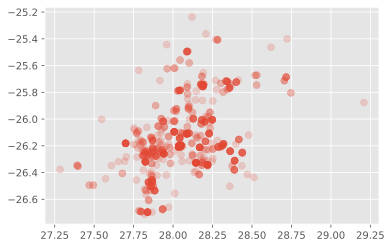

In [12]:
plt.scatter(X[:,0], X[:, 1], alpha=0.2, s=50)

In [0]:
m = folium.Map(location=[df.LAT.mean(), df.LON.mean()], zoom_start=9, tiles='Stamen Toner')

In [0]:
for _, row in df.iterrows():
  folium.CircleMarker(
      location=[row.LAT, row.LON],
      radius=5,
      popup=re.sub(r'[^a-zA-Z]+', '', row.NAME),
      color = '#1787FE'
  ).add_to(m)

In [16]:
m

In [0]:
X_blobs, _ = make_blobs(n_samples=1000, centers=10, n_features=2, cluster_std=0.5, random_state=4)

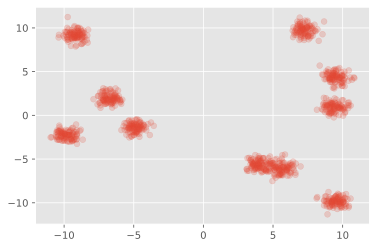

In [19]:
plt.scatter(X_blobs[:,0], X_blobs[:,1], alpha=0.2)

In [0]:
class_predictions = np.load('drive/My Drive/datasets/geolocation/sample_clusters.npy')

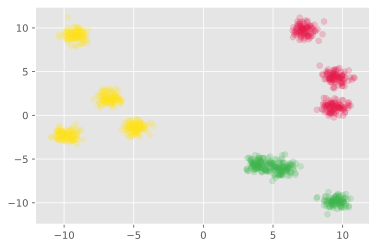

In [22]:
unique_clusters = np.unique(class_predictions)
for unique_clusters in unique_clusters:
  X = X_blobs[class_predictions==unique_clusters]
  plt.scatter(X[:,0],X[:,1], alpha=0.2, c=cols[unique_clusters])

In [23]:
silhouette_score(X_blobs, class_predictions)

0.6657220862867241

In [0]:
class_predictions = np.load('drive/My Drive/datasets/geolocation/sample_clusters_improved.npy')

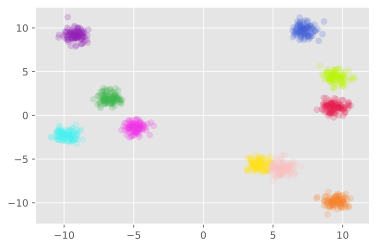

In [25]:
unique_clusters = np.unique(class_predictions)
for unique_cluster in unique_clusters:
    X = X_blobs[class_predictions==unique_cluster]
    plt.scatter(X[:,0], X[:,1], alpha=0.2, c=cols[unique_cluster])

In [26]:
silhouette_score(X_blobs, class_predictions)

0.7473587799908298

In [0]:
X_blobs, _ = make_blobs(n_samples=1000, centers=50, n_features=2, cluster_std=1, random_state=4)

In [0]:
data = defaultdict(dict)
for x in range(1, 21):
  model = KMeans(n_clusters=3, random_state=17, max_iter=x, n_init=1).fit(X_blobs)

In [0]:
data[x]['class_predictions'] = model.predict(X_blobs)

In [0]:
data[x]['centroids'] = model.cluster_centers_

In [0]:
data[x]['unique_classes'] = np.unique(class_predictions)

In [38]:
def f(x):
    class_predictions = data[x]['class_predictions']
    centroids = data[x]['centroids']
    unique_classes = data[x]['unique_classes']

    for unique_class in unique_classes:
            plt.scatter(X_blobs[class_predictions==unique_class][:,0], 
                        X_blobs[class_predictions==unique_class][:,1], 
                        alpha=0.3, c=cols[unique_class])
    plt.scatter(centroids[:,0], centroids[:,1], s=200, c='#000000', marker='v')
    plt.ylim([-15,15]); plt.xlim([-15,15])
    plt.title('How K-Means Clusters')

interactive_plot = interactive(f, x=(1, 20))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(IntSlider(value=10, description='x', max=20, min=1), Output(layout=Layout(height='350px'…

In [0]:
X = np.array(df[['LON', 'LAT']], dtype='float64')
k = 70
model = KMeans(n_clusters=k, random_state=17).fit(X)
class_predictions = model.predict(X)
df[f'CLUSTER_kmeans{k}'] = class_predictions

In [40]:
df.head()

LON       LAT                          NAME  CLUSTER_kmeans70
0  28.17858 -25.73882         11th Street Taxi Rank                15
1  28.17660 -25.73795    81 Bazaar Street Taxi Rank                15
2  27.83239 -26.53722          Adams Road Taxi Rank                 5
3  28.12514 -26.26666  Alberton City Mall Taxi Rank                33
4  28.10144 -26.10567      Alexandra Main Taxi Rank                18

In [0]:
def create_map(df, cluster_column):
    m = folium.Map(location=[df.LAT.mean(), df.LON.mean()], zoom_start=9, tiles='Stamen Toner')

    for _, row in df.iterrows():

        if row[cluster_column] == -1:
            cluster_colour = '#000000'
        else:
            cluster_colour = cols[row[cluster_column]]

        folium.CircleMarker(
            location= [row['LAT'], row['LON']],
            radius=5,
            popup= row[cluster_column],
            color=cluster_colour,
            fill=True,
            fill_color=cluster_colour
        ).add_to(m)
        
    return m



In [49]:
m = create_map(df, 'CLUSTER_kmeans70')

AttributeError: ignored

In [50]:
print(f'K={k}')
print(f'Silhouette Score: {silhouette_score(X, class_predictions)}')

m.save('kmeans_70.html')

K=70
Silhouette Score: 0.6367300948961482


In [51]:
m

In [52]:
best_silhouette, best_k = -1, 0

for k in tqdm(range(2, 100)):
    model = KMeans(n_clusters=k, random_state=1).fit(X)
    class_predictions = model.predict(X)
    
    curr_silhouette = silhouette_score(X, class_predictions)
    if curr_silhouette > best_silhouette:
        best_k = k
        best_silhouette = curr_silhouette
        
print(f'K={best_k}')
print(f'Silhouette Score: {best_silhouette}') 

100%|██████████| 98/98 [00:30<00:00,  3.21it/s]

K=98
Silhouette Score: 0.6971995093340411


In [0]:
dummy = np.array([-1, -1, -1, 2, 3, 4, 5, -1])

new = np.array([(counter+2)*x if x==-1 else x for counter, x in enumerate(dummy)])

In [0]:
model = DBSCAN(eps=0.01, min_samples=5).fit(X)
class_predictions = model.labels_

df['CLUSTERS_DBSCAN'] = class_predictions

In [55]:
m = create_map(df, 'CLUSTERS_DBSCAN')

    
print(f'Number of clusters found: {len(np.unique(class_predictions))}')
print(f'Number of outliers found: {len(class_predictions[class_predictions==-1])}')

print(f'Silhouette ignoring outliers: {silhouette_score(X[class_predictions!=-1], class_predictions[class_predictions!=-1])}')

no_outliers = 0
no_outliers = np.array([(counter+2)*x if x==-1 else x for counter, x in enumerate(class_predictions)])
print(f'Silhouette outliers as singletons: {silhouette_score(X, no_outliers)}')

AttributeError: ignored

In [56]:
m

In [0]:
model = hdbscan.HDBSCAN(min_cluster_size=5, min_samples=2, 
                        cluster_selection_epsilon=0.01)

In [0]:
class_predictions = model.fit_predict(X)
df['CLUSTER_HDBSCAN'] = class_predictions

In [59]:
m = create_map(df, 'CLUSTER_HDBSCAN')

print(f'Number of clusters found: {len(np.unique(class_predictions))-1}')
print(f'Number of outliers found: {len(class_predictions[class_predictions==-1])}')

print(f'Silhouette ignoring outliers: {silhouette_score(X[class_predictions!=-1], class_predictions[class_predictions!=-1])}')

no_outliers = np.array([(counter+2)*x if x==-1 else x for counter, x in enumerate(class_predictions)])
print(f'Silhouette outliers as singletons: {silhouette_score(X, no_outliers)}')

m

AttributeError: ignored

In [0]:
hdbscan.HDBSCAN?

In [0]:
classifier = KNeighborsClassifier(n_neighbors=1)

In [0]:
df_train = df[df.CLUSTER_HDBSCAN!=-1]
df_predict = df[df.CLUSTER_HDBSCAN==-1]

In [0]:
X_train = np.array(df_train[['LON', 'LAT']], dtype='float64')
y_train = np.array(df_train['CLUSTER_HDBSCAN'])

X_predict = np.array(df_predict[['LON', 'LAT']], dtype='float64')

In [64]:
predictions = classifier.predict(X_predict)

NotFittedError: ignored

In [0]:
df['CLUSTER_hybrid'] = df['CLUSTER_HDBSCAN']

In [66]:
df.loc[df.CLUSTER_HDBSCAN==-1, 'CLUSTER_hybrid'] = predictions

NameError: ignored

In [67]:
m = create_map(df, 'CLUSTER_hybrid')

AttributeError: ignored

In [68]:
m

In [69]:
class_predictions = df.CLUSTER_hybrid
print(f'Number of clusters found: {len(np.unique(class_predictions))}')
print(f'Silhouette: {silhouette_score(X, class_predictions)}')

m.save('hybrid.html')

Number of clusters found: 67
Silhouette: 0.5686171941570188


Text(0.5, 0, 'Cluster Sizes')

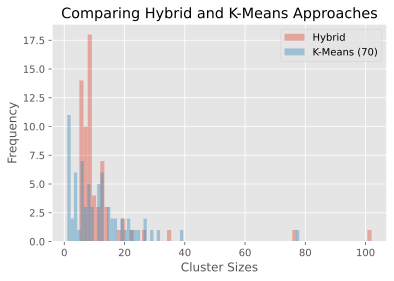

In [70]:
df['CLUSTER_hybrid'].value_counts().plot.hist(bins=70, alpha=0.4, 
                                              label='Hybrid')
df['CLUSTER_kmeans70'].value_counts().plot.hist(bins=70, alpha=0.4,
                                               label='K-Means (70)')
plt.legend()
plt.title('Comparing Hybrid and K-Means Approaches')
plt.xlabel('Cluster Sizes')